In [1]:
#!pip install tensorflow-gpu

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split

#Load Dataset

In [3]:
#from google.colab import files
#data = files.upload()

In [5]:
file = open('D:/gitNew/WISDM_ar_latest/WISDM_ar_v1.1/WISDM_ar_v1.1_raw.txt')
lines = file.readlines()

processedList = []
for i, line in enumerate(lines):
  try:
    line = line.split(',')
    last = line[5].split(';')[0]
    last = last.strip()
    if last == '':
      break;
    temp = [line[0],line[1],line[2],line[3],line[4],last]
    processedList.append(temp)
  except:
    print('error at line: ', i)

error at line:  281873
error at line:  281874
error at line:  281875


In [6]:
processedList

[['33', 'Jogging', '49105962326000', '-0.6946377', '12.680544', '0.50395286'],
 ['33', 'Jogging', '49106062271000', '5.012288', '11.264028', '0.95342433'],
 ['33', 'Jogging', '49106112167000', '4.903325', '10.882658', '-0.08172209'],
 ['33', 'Jogging', '49106222305000', '-0.61291564', '18.496431', '3.0237172'],
 ['33', 'Jogging', '49106332290000', '-1.1849703', '12.108489', '7.205164'],
 ['33', 'Jogging', '49106442306000', '1.3756552', '-2.4925237', '-6.510526'],
 ['33', 'Jogging', '49106542312000', '-0.61291564', '10.56939', '5.706926'],
 ['33', 'Jogging', '49106652389000', '-0.50395286', '13.947236', '7.0553403'],
 ['33', 'Jogging', '49106762313000', '-8.430995', '11.413852', '5.134871'],
 ['33', 'Jogging', '49106872299000', '0.95342433', '1.3756552', '1.6480621'],
 ['33', 'Jogging', '49106982315000', '-8.19945', '19.57244', '2.7240696'],
 ['33', 'Jogging', '49107092330000', '1.4165162', '5.7886477', '2.982856'],
 ['33', 'Jogging', '49107202316000', '-1.879608', '-2.982856', '-0.2996

In [7]:
columns = ['user','activity','time','x','y','z']

In [10]:
data = pd.DataFrame(data= processedList,columns=columns)
data.head()

,user,activity,time,x,y,z
0,33,Jogging,49105962326000,-0.6946377,12.680544,0.50395286
1,33,Jogging,49106062271000,5.012288,11.264028,0.95342433
2,33,Jogging,49106112167000,4.903325,10.882658,-0.08172209
3,33,Jogging,49106222305000,-0.61291564,18.496431,3.0237172
4,33,Jogging,49106332290000,-1.1849703,12.108489,7.205164


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343416 entries, 0 to 343415
Data columns (total 6 columns):
user        343416 non-null object
activity    343416 non-null object
time        343416 non-null object
x           343416 non-null object
y           343416 non-null object
z           343416 non-null object
dtypes: object(6)
memory usage: 15.7+ MB


In [12]:
data.shape

(343416, 6)

In [13]:
data.isnull().sum()

user        0
activity    0
time        0
x           0
y           0
z           0
dtype: int64

In [14]:
data['activity'].value_counts()

Walking       137375
Jogging       129392
Upstairs       35137
Downstairs     33358
Sitting         4599
Standing        3555
Name: activity, dtype: int64

#balancing the data

In [15]:
data['x'] = data['x'].astype('float')
data['y'] = data['y'].astype('float')
data['z'] = data['z'].astype('float')

In [16]:
Fs = 20
activities = data['activity'].value_counts().index

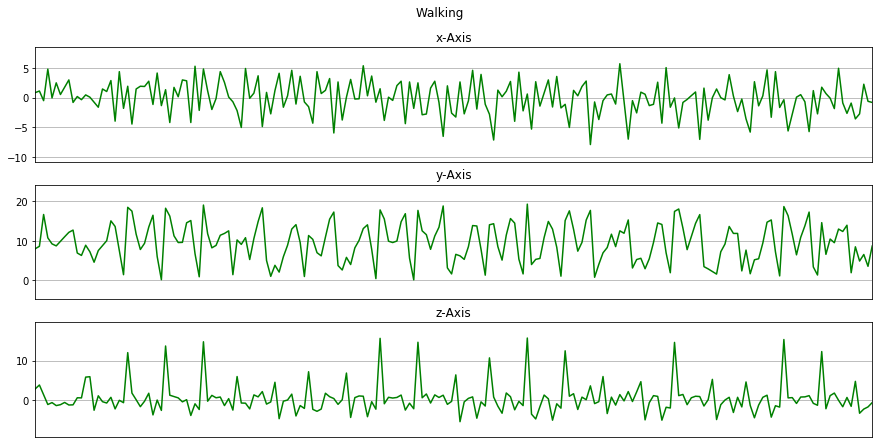

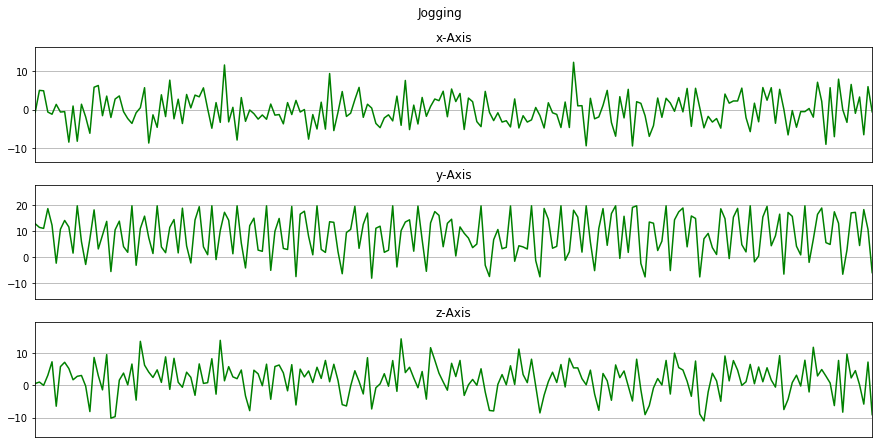

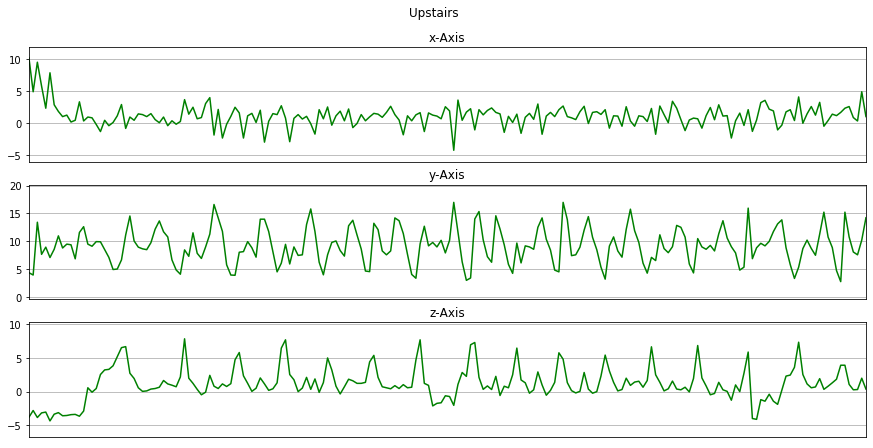

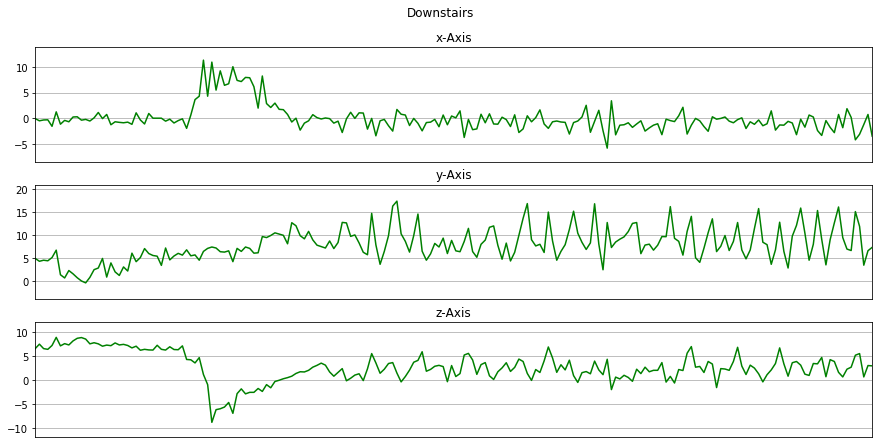

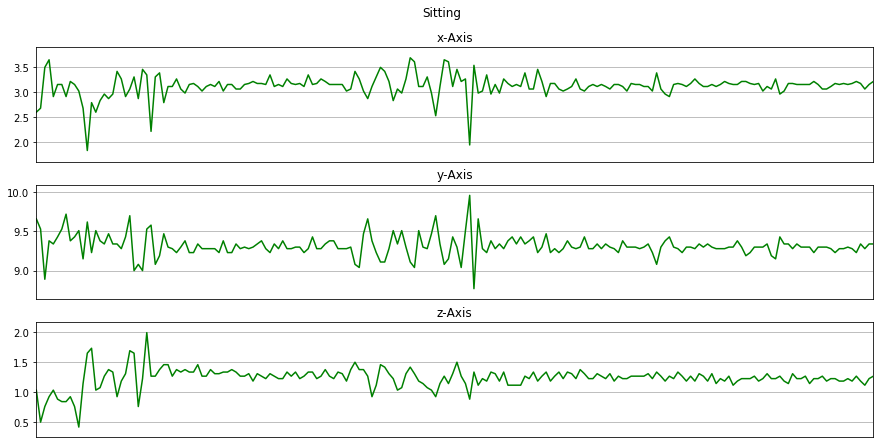

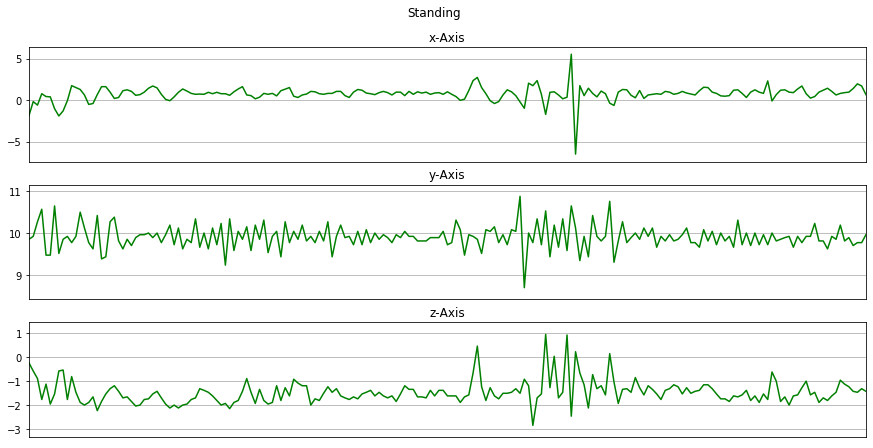

In [17]:
def plot_activity(activity,data):
  fig ,(ax0,ax1,ax2) = plt.subplots(nrows=3,figsize=(15,7),sharex=True)
  plot_axis(ax0,data['time'],data['x'],'x-Axis')
  plot_axis(ax1,data['time'],data['y'],'y-Axis')
  plot_axis(ax2,data['time'],data['z'],'z-Axis')
  plt.subplots_adjust(hspace =0.2)
  fig.suptitle(activity)
  plt.subplots_adjust(top=0.90)
  plt.show()

def plot_axis(ax, x, y,title):
  ax.plot(x,y,'g')
  ax.set_title(title)
  ax.xaxis.set_visible(False)
  ax.set_ylim([min(y)-np.std(y),max(y) + np.std(y)])
  ax.set_xlim([min(x),max(x)])
  ax.grid(True)

for activity in activities:
  data_for_plot = data[(data['activity']==activity)][:Fs*10]
  plot_activity(activity,data_for_plot)

In [18]:
df = data.drop(['user','time'],axis=1).copy()
df.head()

,activity,x,y,z
0,Jogging,-0.694638,12.680544,0.503953
1,Jogging,5.012288,11.264028,0.953424
2,Jogging,4.903325,10.882658,-0.081722
3,Jogging,-0.612916,18.496431,3.023717
4,Jogging,-1.184970,12.108489,7.205164


In [19]:
activities

Index(['Walking', 'Jogging', 'Upstairs', 'Downstairs', 'Sitting', 'Standing'], dtype='object')

In [20]:
Walking = df[df['activity']=='Walking'].head(3555).copy()
Jogging = df[df['activity']=='Jogging'].head(3555).copy()
Upstairs = df[df['activity']=='Upstairs'].head(3555).copy()
Downstairs =df[df['activity']=='Downstairs'].head(3555).copy()
Sitting = df[df['activity']=='Sitting'].head(3555).copy()
Standing = df[df['activity']=='Standing'].copy()

In [21]:
balanced_data = pd.DataFrame()
balanced_data = balanced_data.append([Walking,Jogging,Upstairs,Downstairs,Sitting,Standing])
balanced_data.shape

(21330, 4)

In [22]:
balanced_data['activity'].value_counts()

Walking       3555
Jogging       3555
Upstairs      3555
Standing      3555
Downstairs    3555
Sitting       3555
Name: activity, dtype: int64

In [23]:
balanced_data.head()

,activity,x,y,z
597,Walking,0.844462,8.008764,2.792171
598,Walking,1.116869,8.621680,3.786457
599,Walking,-0.503953,16.657684,1.307553
600,Walking,4.794363,10.760075,-1.184970
601,Walking,-0.040861,9.234595,-0.694638


In [24]:
from sklearn.preprocessing import LabelEncoder


In [25]:
label = LabelEncoder()
balanced_data['label'] = label.fit_transform(balanced_data['activity'])
balanced_data.head()

,activity,x,y,z,label
597,Walking,0.844462,8.008764,2.792171,5
598,Walking,1.116869,8.621680,3.786457,5
599,Walking,-0.503953,16.657684,1.307553,5
600,Walking,4.794363,10.760075,-1.184970,5
601,Walking,-0.040861,9.234595,-0.694638,5


In [26]:
label.classes_

array(['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs',
       'Walking'], dtype=object)

#Standarisation

In [27]:
x = balanced_data[['x','y','z']]
y = balanced_data['label']

In [28]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

scaled_x = pd.DataFrame(data = x,columns = ['x','y','z'])
scaled_x['label'] = y.values

scaled_x

,x,y,z,label
0,0.000503,-0.099190,0.337933,5
1,0.073590,0.020386,0.633446,5
2,-0.361275,1.588160,-0.103312,5
3,1.060258,0.437573,-0.844119,5
4,-0.237028,0.139962,-0.698386,5
5,0.442677,0.041644,-0.925081,5
6,-0.083546,0.267510,-0.856263,5
7,0.245343,0.490718,-0.686242,5
8,0.574233,0.708612,-0.880552,5
9,-0.441670,0.820217,-0.868408,5


#frame preparation

In [29]:
import scipy.stats as stats


In [30]:
Fs = 20
frame_size = Fs*4
hop_size =Fs*2

In [31]:
def get_frame(df,frame_size ,hop_size):
  N_Features = 3
  frames =[]
  labels = []

  for i in range(0,len(df) - frame_size,hop_size):
    x= df['x'].values[i:i+ frame_size]
    y= df['y'].values[i:i+ frame_size]
    z= df['z'].values[i:i+ frame_size]

    label = stats.mode(df['label'][i:i+frame_size])[0][0]
    frames.append([x,y,z])
    labels.append(label)
  frames = np.asarray(frames).reshape(-1,frame_size,N_Features)
  labels = np.asarray(labels)
  return frames, labels

In [32]:
x,y = get_frame(scaled_x,frame_size,hop_size)

In [33]:
x.shape,y.shape

((532, 80, 3), (532,))

In [34]:
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size =0.2,random_state = 0,stratify =y)

In [35]:
x_train = x_train.reshape(425,80,3,1)
x_test = x_test.reshape(107,80,3,1)


In [36]:
x_train.shape,x_test.shape

((425, 80, 3, 1), (107, 80, 3, 1))

In [37]:
model = Sequential()
model.add(Conv2D(16,(2,2),activation='relu',input_shape = x_train[0].shape))
model.add(Dropout(0.2))

model.add(Conv2D(32,(2,2),activation='relu'))
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(6,activation='softmax'))

In [38]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics =['accuracy'])

In [39]:
history = model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test),verbose=1)

Train on 425 samples, validate on 107 samples
Epoch 1/10
425/425 [==============================] - 3s 6ms/sample - loss: 1.5965 - accuracy: 0.3318 - val_loss: 1.2966 - val_accuracy: 0.5421
Epoch 2/10
425/425 [==============================] - 0s 456us/sample - loss: 1.1964 - accuracy: 0.5671 - val_loss: 0.8693 - val_accuracy: 0.7757
Epoch 3/10
425/425 [==============================] - 0s 456us/sample - loss: 0.8305 - accuracy: 0.7388 - val_loss: 0.5465 - val_accuracy: 0.8692
Epoch 4/10
425/425 [==============================] - 0s 418us/sample - loss: 0.6044 - accuracy: 0.8000 - val_loss: 0.3902 - val_accuracy: 0.8785
Epoch 5/10
425/425 [==============================] - 0s 411us/sample - loss: 0.4599 - accuracy: 0.8612 - val_loss: 0.3115 - val_accuracy: 0.8972
Epoch 6/10
425/425 [==============================] - 0s 441us/sample - loss: 0.3468 - accuracy: 0.8918 - val_loss: 0.2845 - val_accuracy: 0.8505
Epoch 7/10
425/425 [==============================] - 0s 424us/sample - loss: 0.

In [40]:
def plot_learningcurve(history,epochs):
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

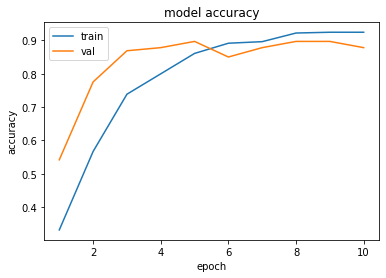

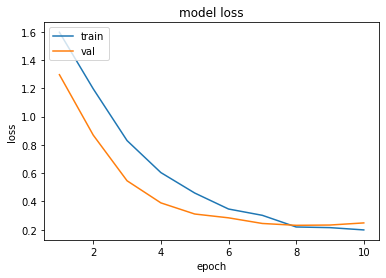

In [41]:
plot_learningcurve(history,10)

#confusion matrix

In [42]:
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.evaluate import confusion_matrix

In [43]:
y_pred = model.predict_classes(x_test)

In [44]:
activities =['Downstairs', 'Jogging', 'Sitting', 'Standing', 'Upstairs','Walking']

(<Figure size 432x432 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x20c670da240>)

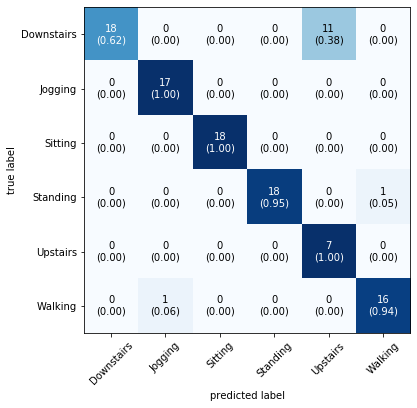

In [45]:
mat = confusion_matrix(y_pred,y_test)
plot_confusion_matrix(conf_mat = mat,show_normed=True,figsize=(6,6),class_names = activities)
